# Kolokwium 2


## zadanie 1

In [12]:
options(warn = -1)


    75% 
328.585 
[1] 43.50517

(180,228] (228,276] (276,324] (324,372] (372,420] 
        2        14        19        15         0 


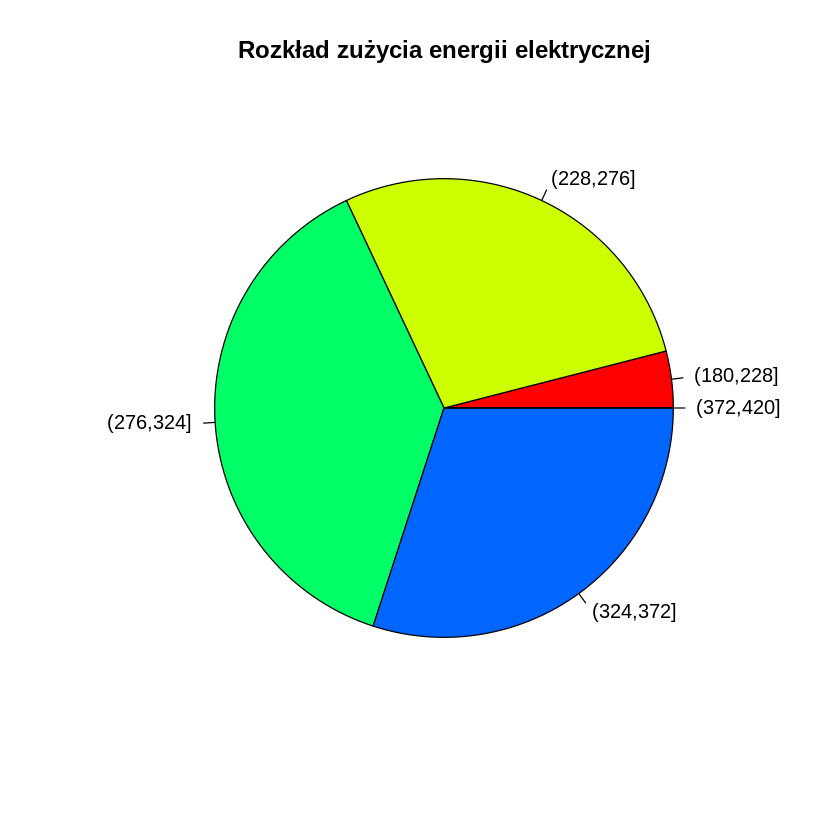

In [13]:
dane <- read.csv("dane/dane.csv", sep = ";", dec = ",", header = TRUE)
energia <- na.omit(as.numeric(dane$energia))
# Trzeci kwantyl

kwantyl3 <- quantile(energia, 0.75)
# Odchylenie Standardowe
odchylenie <- sd(energia)
# Interpretacja 3ciego kwantyla 
# 3ci kwantyl zwraca nam wartość poniżej której znajduje się 75% wartości
# Interpretacja odchylenia standardowego
# Odchylenie standardowe to miara rozproszenia wartości wokół średniej
print(kwantyl3)
print(odchylenie)

# Szereg rozdzielczy przedziałowy
granice_przedzialow <- seq(180, 420, length.out = 6)
szereg <- table(cut(energia, breaks = granice_przedzialow))
print(szereg)

# Wykres kołowy zużycia energii elektrycznej z szeregu rozdzielczego
pie(szereg, 
    main = "Rozkład zużycia energii elektrycznej", 
    col = rainbow(length(szereg)))


## Zadanie 2


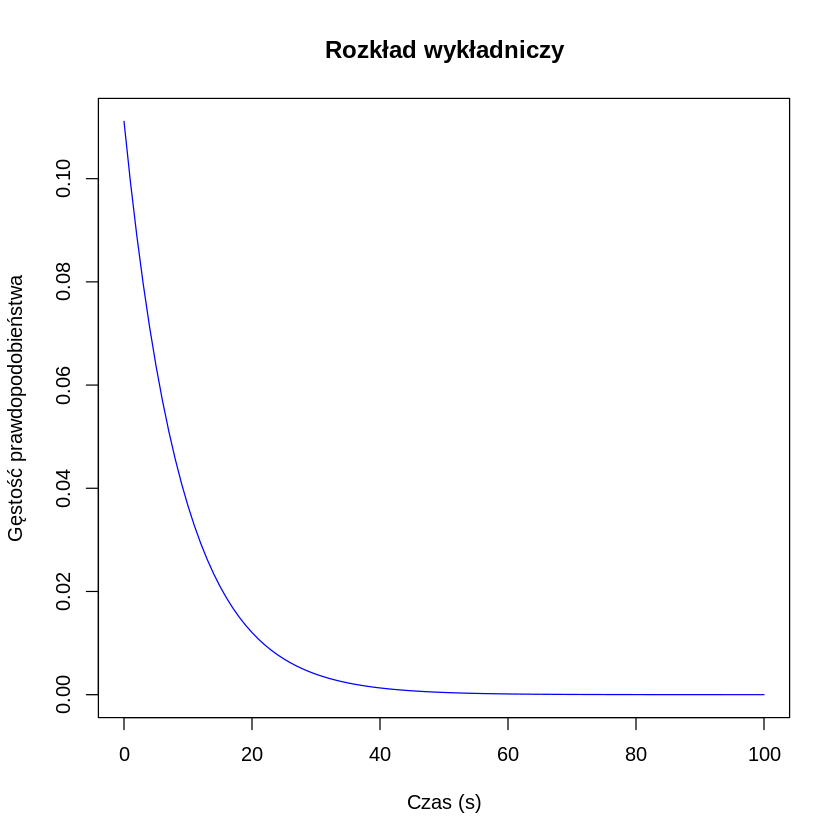

In [ ]:
# Rozkład wykładniczy (X)
h <- 9
# h rozpadow na sekunde kazdy pomiar trwa 1 sekunde

lambda <- 1/h
x <- seq(0, 100, by = 1)
y <- dexp(x, rate = 1/h)
plot(x, y, type = "l", 
     main = "Rozkład wykładniczy", 
     xlab = "Czas (s)", 
     ylab = "Gęstość prawdopodobieństwa", 
     col = "blue")



In [21]:
# P(X < 3)
p_x_3 <- pexp(3, rate = lambda)
print(p_x_3)
# P(X > 3) = 1 - P(X < 3)
p_x_3_greater <- 1 - p_x_3
print(p_x_3_greater)
# P(X <= 3)
p_x_3_less_equal <- pexp(3, rate = lambda, lower.tail = TRUE)
print(p_x_3_less_equal)



[1] 0.2834687
[1] 0.7165313
[1] 0.2834687


## Zadanie 3

In [27]:
# Rozkład średniego wzrostu 40 kobiet
n <- 40                # liczba kobiet w próbie
h <- 9                 # parametr h (można zmienić)
mu_populacji <- 165 + h  # średnia populacji
sigma_populacji <- 5   # odchylenie standardowe populacji

# Parametry rozkładu średniej z próby
mu_sredniej <- mu_populacji   
sigma_sredniej <- sigma_populacji / sqrt(n)  

# Wyświetlenie wyników
cat("Rozkład średniego wzrostu 40 kobiet:\n")
cat("Średnia rozkładu:", mu_sredniej, "cm\n")
cat("Odchylenie standardowe rozkładu:", round(sigma_sredniej, 4), "cm\n")
cat("Wariancja rozkładu:", round(sigma_sredniej^2, 6), "\n")
cat("Rozkład: normalny N(", mu_sredniej, ",", round(sigma_sredniej^2, 6), ")\n")

Rozkład średniego wzrostu 40 kobiet:
Średnia rozkładu: 174 cm
Odchylenie standardowe rozkładu: 0.7906 cm
Wariancja rozkładu: 0.625 
Rozkład: normalny N( 174 , 0.625 )


In [2]:
oblicz_prawdopodobienstwo <- function(h) {
  srednia <- 165 + h
  odch_std_sredniej <- 5 / sqrt(40)
  
  p_gorna <- pnorm(167, mean = srednia, sd = odch_std_sredniej)
  p_dolna <- pnorm(164, mean = srednia, sd = odch_std_sredniej)
  
  return(p_gorna - p_dolna)
}

# Obliczamy prawdopodobieństwo dla h = 3
h <- 1
prawdopodobienstwo <- oblicz_prawdopodobienstwo(h)
cat("Prawdopodobieństwo, że średni wzrost 40 kobiet mieści się w przedziale [164, 167] cm:", prawdopodobienstwo, "\n")

Prawdopodobieństwo, że średni wzrost 40 kobiet mieści się w przedziale [164, 167] cm: 0.8913424 


## Zadanie 4


In [31]:
dane <- read.csv("dane/dane2.csv", sep = ";", dec = ",", header = TRUE)
moc <- na.omit(as.numeric(dane$moc))
moc
# przedzial 99 ufnosci
library(BSDA)  # Wczytanie pakietu BSDA
poziom_ufnosci <- 0.99
wynik <- t.test(moc, conf.level = poziom_ufnosci)
przedział <- wynik$conf.int
print(przedział)
# Ile potrzeba pomiarów, aby błąd estymacji wynosił 0.1 setek kW?
s <- sd(moc)
t_wartosc <- qt(1-(1-poziom_ufnosci)/2, df = Inf)  # Przybliżenie dla dużej próby
n_wymagane <- ceiling((t_wartosc * s / 0.1)^2)
print(paste("Wymagana wielkość próby:", n_wymagane))


[1]  8.42  7.43  7.97  6.99  8.47  7.18  7.29  6.98  6.91  8.64  6.69  7.16
[13]  6.13 10.14  4.76  8.18

[1] 6.568643 8.348857
attr(,"conf.level")
[1] 0.99
[1] "Wymagana wielkość próby: 969"
